In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


In [2]:
df = pd.read_csv("train.csv")
df.head()


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
 # Temel Veri İncelemesi (EDA)

In [4]:
# Boyut ve eksik veri kontrolü
print(df.shape)
print(df.isnull().sum())

# Sütun tipleri ve örnek veri
print(df.dtypes)
print(df['store'].nunique(), "farklı mağaza")
print(df['item'].nunique(), "farklı ürün")

(913000, 4)
date     0
store    0
item     0
sales    0
dtype: int64
date     object
store     int64
item      int64
sales     int64
dtype: object
10 farklı mağaza
50 farklı ürün


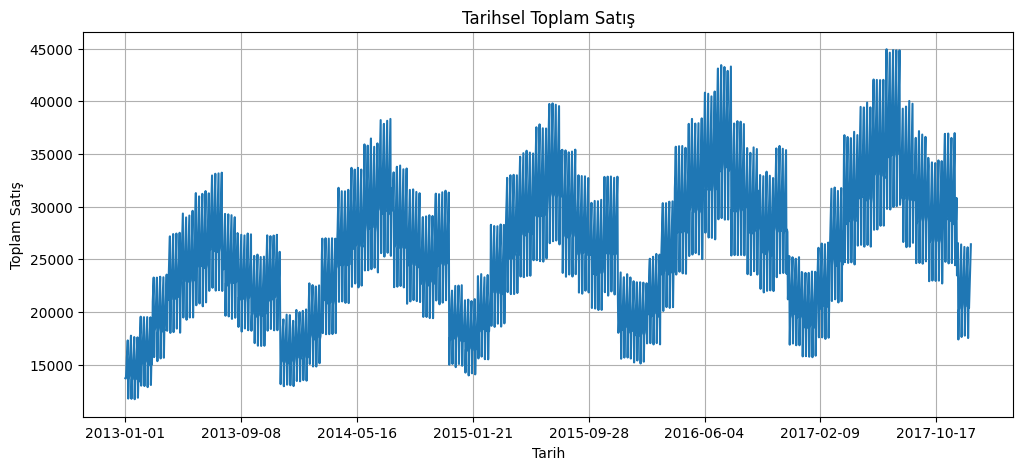

In [5]:
# Zaman Serisi Biçimlendirme
plt.figure(figsize=(12,5))
df.groupby('date')['sales'].sum().plot()
plt.title("Tarihsel Toplam Satış")
plt.xlabel("Tarih")
plt.ylabel("Toplam Satış")
plt.grid(True)
plt.show()


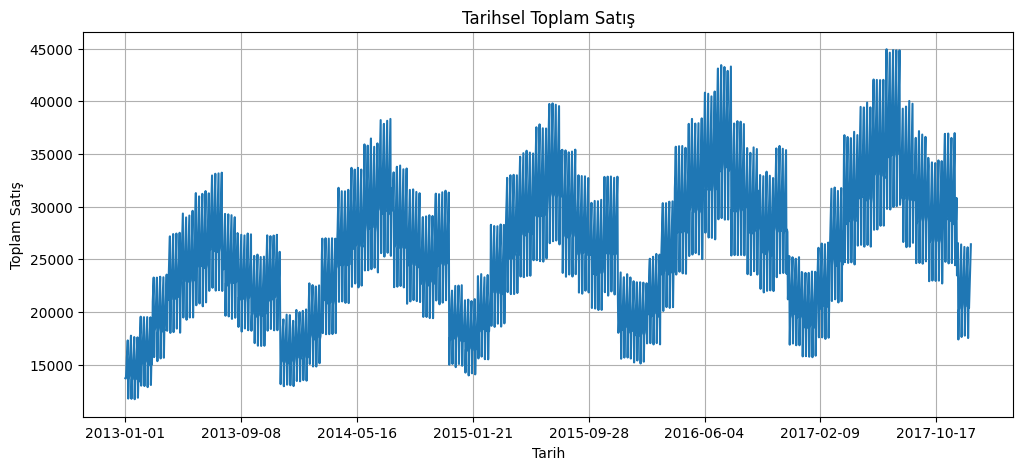

In [6]:
# Örnek Grafik – Satışların Zamanla Değişimi
plt.figure(figsize=(12,5))
df.groupby('date')['sales'].sum().plot()
plt.title("Tarihsel Toplam Satış")
plt.xlabel("Tarih")
plt.ylabel("Toplam Satış")
plt.grid(True)
plt.show()


In [8]:
df['date'] = pd.to_datetime(df['date'])


In [9]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek


In [10]:
sample = df[(df['store'] == 1) & (df['item'] == 1)].copy()

sample['days_since_start'] = (sample['date'] - sample['date'].min()).dt.days

X = sample[['days_since_start']]
y = sample['sales']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"RMSE: {rmse:.2f}")


RMSE: 6.38


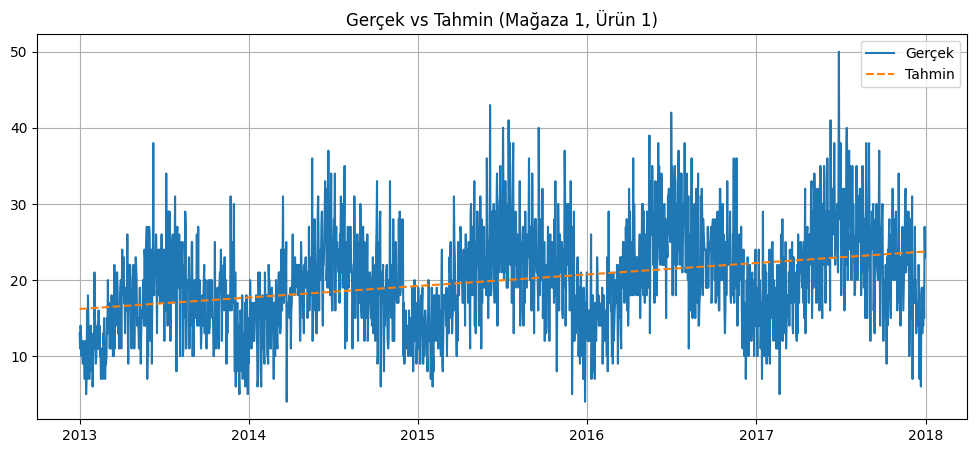

In [11]:
plt.figure(figsize=(12,5))
plt.plot(sample['date'], y, label='Gerçek')
plt.plot(sample['date'], y_pred, label='Tahmin', linestyle='--')
plt.title("Gerçek vs Tahmin (Mağaza 1, Ürün 1)")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# pip install prophet


In [14]:
from prophet import Prophet

# Prophet için özel veri çerçevesi
df_prophet = sample[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})


In [15]:
model = Prophet()
model.fit(df_prophet)


22:04:06 - cmdstanpy - INFO - Chain [1] start processing
22:04:06 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)


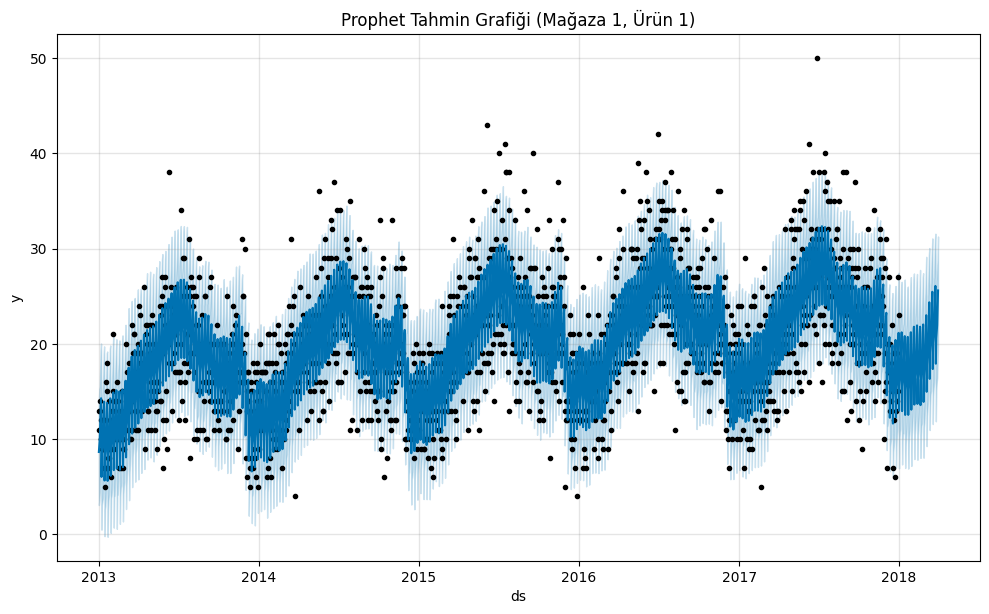

In [17]:
fig = model.plot(forecast)
plt.title("Prophet Tahmin Grafiği (Mağaza 1, Ürün 1)")
plt.show()


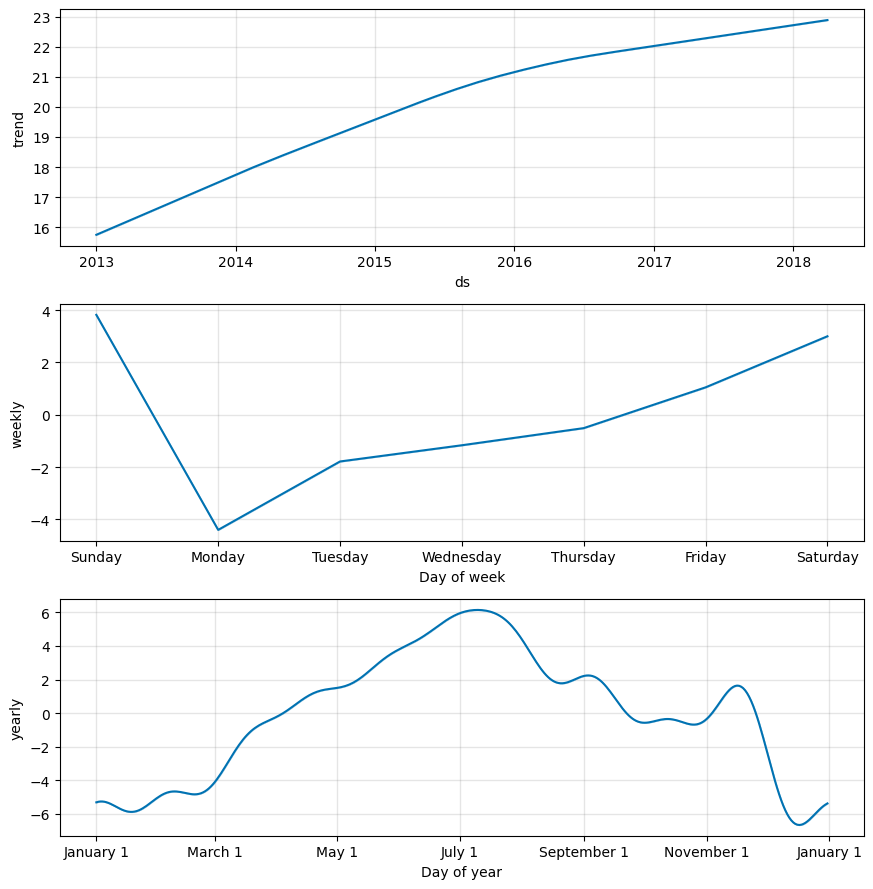

In [18]:
model.plot_components(forecast)
plt.show()


In [20]:
import pickle

with open("prophet_model.pkl", "wb") as f:
    pickle.dump(model, f)
